# Benchmark the G-Sobol test function

In [1]:
import openturns as ot
import otbenchmark as otb
import openturns.viewer as otv

In [2]:
problem = otb.GSobolSensitivity()

In [3]:
print(problem)

name = GSobol
distribution = ComposedDistribution(Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), Uniform(a = 0, b = 1), IndependentCopula(dimension = 3))
function = class=PythonEvaluation name=OpenTURNSPythonFunction
firstOrderIndices = [0.986712,0.00986712,9.86712e-05]
totalOrderIndices = [0.990034,0.0131566,0.000132]


In [4]:
distribution = problem.getInputDistribution()
model = problem.getFunction()

In [5]:
# Exact first and total order
exact_first_order = problem.getFirstOrderIndices()
exact_first_order

class=Point name=Unnamed dimension=3 values=[0.986712,0.00986712,9.86712e-05]

In [6]:
exact_total_order = problem.getTotalOrderIndices()
exact_total_order

class=Point name=Unnamed dimension=3 values=[0.990034,0.0131566,0.000132]

## Plot function

In [7]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 200
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [8]:
dimension = distribution.getDimension()
full_sample = ot.Sample(size, 1 + dimension)
full_sample[:, range(dimension)] = inputDesign
full_sample[:, dimension] = outputDesign
full_description = list(inputDesign.getDescription())
full_description.append(outputDesign.getDescription()[0])
full_sample.setDescription(full_description)

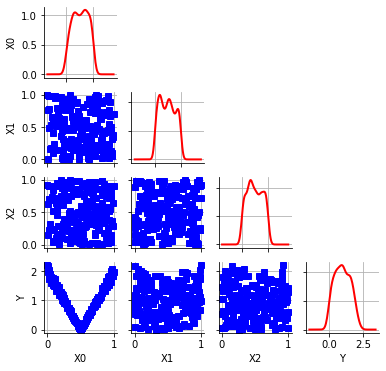

In [9]:
marginal_distribution = ot.ComposedDistribution(
    [
        ot.KernelSmoothing().build(full_sample.getMarginal(i))
        for i in range(1 + dimension)
    ]
)
clouds = ot.VisualTest.DrawPairsMarginals(full_sample, marginal_distribution)
view = otv.View(clouds, figure_kw={"figsize": (6.0, 6.0)})

In [10]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 1000
inputDesign = ot.MonteCarloExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

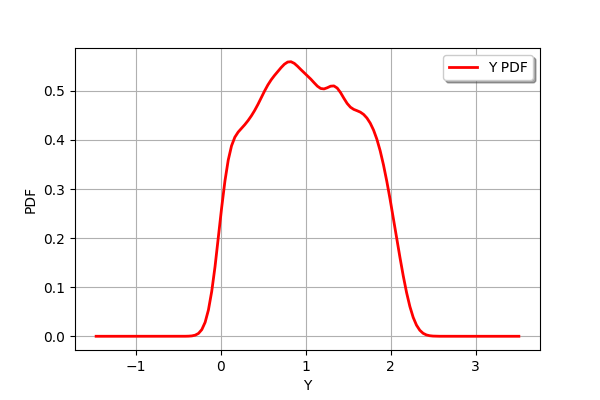

In [11]:
output_distribution = ot.KernelSmoothing().build(outputDesign)
output_distribution.drawPDF()

## Perform SA

In [12]:
# Create X/Y data
ot.RandomGenerator.SetSeed(0)
size = 10000
inputDesign = ot.SobolIndicesExperiment(distribution, size).generate()
outputDesign = model(inputDesign)

In [13]:
# Compute first order indices using the Saltelli estimator
sensitivityAnalysis = ot.SaltelliSensitivityAlgorithm(inputDesign, outputDesign, size)
computed_first_order = sensitivityAnalysis.getFirstOrderIndices()
computed_total_order = sensitivityAnalysis.getTotalOrderIndices()

In [14]:
# Compare with exact results
print("Sample size : ", size)
# First order
# Compute absolute error (the LRE cannot be computed,
# because S can be zero)
print("Computed first order = ", computed_first_order)
print("Exact first order = ", exact_first_order)
# Total order
print("Computed total order = ", computed_total_order)
print("Exact total order = ", exact_total_order)

Sample size :  10000
Computed first order =  [0.978662,0.0214842,0.0124414]
Exact first order =  [0.986712,0.00986712,9.86712e-05]
Computed total order =  [0.979671,0.0104553,-4.13023e-05]
Exact total order =  [0.990034,0.0131566,0.000132]


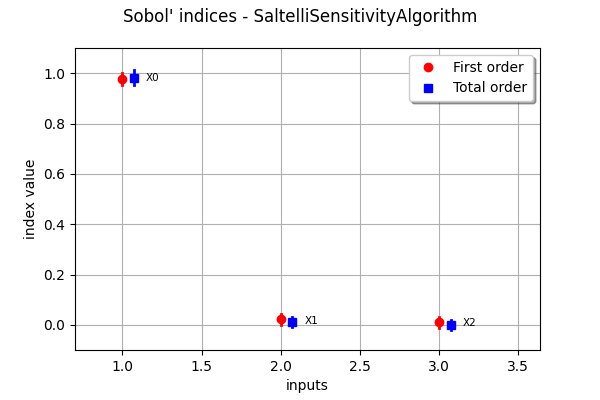

In [15]:
sensitivityAnalysis.draw()